# Project on commercial property automated valuation

## Part 1: Libraries, reading and cleaning data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns

### Commercial Property data

In [2]:
df = pd.read_csv('data/combined_all.csv', low_memory = False)
df = df.rename (columns = {'Transacted Price ($)': 'Transaction_Price',
                           'Sale Date': 'Sale_date',
                           'Unit Price ($ PSM)': 'PSM',
                          'Area (SQM)': 'Area_sqm',
                           'Property Type': 'Property_type',                        
                          'Type of Sale': 'Type_of_sale',
                           'Planning Area': 'Planning_area',
                           'Type of Area': 'Type_of_area',
                           'Planning Region' : 'Planning_region',
                           'Postal District': "Postal_district",
                           'Postal Sector': 'Postal_sector'
                          })

df = df.astype({"Year": int})
df = df.astype({"Planning_area_population": float})
df = df.astype({"Planning_area_size": float})

In [3]:
df.head()
df = df[["Project Name","Sale_date","Area_sqm","Property_type","Type_of_sale","Tenure_type","Type_of_area","Postal_sector",'Planning_area',"PPI","Year","Quarter","Median_resi_psf","Age_years","Planning_area_size","Planning_area_population","Planning_area_density","Transaction_Price"]]
df = df.dropna(subset=['PPI'])
df = df.reset_index(drop=True)

## Part 2: Running the predictive regression

### Initial regression for all 7 property types

In [4]:
res1 = smf.ols('np.log(Transaction_Price) ~ np.log(Area_sqm) + np.log(PPI) + Year + C(Type_of_sale) + C(Property_type) + C(Tenure_type) + C(Type_of_area) + C(Postal_sector) + C(Planning_area)' , data = df).fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     np.log(Transaction_Price)   R-squared:                       0.838
Model:                                   OLS   Adj. R-squared:                  0.838
Method:                        Least Squares   F-statistic:                     2486.
Date:                       Sun, 17 Apr 2022   Prob (F-statistic):               0.00
Time:                               05:45:59   Log-Likelihood:                -30551.
No. Observations:                      63146   AIC:                         6.137e+04
Df Residuals:                          63014   BIC:                         6.256e+04
Df Model:                                131                                         
Covariance Type:                   nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                   -40.1167      0.699    -57.415      0.000     -41.486     -38.747
C(Type_of_sale)[T.Resale]                    -0.2680      0.004    -67.738      0.000      -0.276      -0.260
C(Type_of_sale)[T.Sub Sale]                   0.0029      0.010      0.293      0.769      -0.016       0.022
C(Property_type)[T.Multiple-user Factory]    -0.5179      0.075     -6.869      0.000      -0.666      -0.370
C(Property_type)[T.Office]                   -0.0739      0.076     -0.974      0.330      -0.223       0.075
C(Property_type)[T.Retail]                    0.4500      0.076      5.908      0.000       0.301       0.599
C(Property_type)[T.Shop House]               -0.3356      0.075     -4.489      0.000      -0.482      -0.189
C(Property_type)[T.Single-user Factory]      -1.0333      0.074    -13.977      0.000      -1.178      -0.888
C(Property_type)[T.Warehouse]                -0.3622      0.076     -4.793      0.000      -0.510      -0.214
C(Tenure_type)[T.Leasehold]                  -0.4068      0.006    -71.737      0.000      -0.418      -0.396
C(Type_of_area)[T.Land]                       0.4303      0.087      4.968      0.000       0.261       0.600
C(Type_of_area)[T.Strata]                    -0.2997      0.087     -3.462      0.001      -0.469      -0.130
C(Postal_sector)[T.3]                        -0.5906      0.228     -2.589      0.010      -1.038      -0.143
C(Postal_sector)[T.4]                        -0.8081      0.228     -3.544      0.000      -1.255      -0.361
C(Postal_sector)[T.5]                        -1.4811      0.228     -6.493      0.000      -1.928      -1.034
C(Postal_sector)[T.6]                        -1.2105      0.227     -5.324      0.000      -1.656      -0.765
C(Postal_sector)[T.7]                        -1.1860      0.227     -5.217      0.000      -1.632      -0.740
C(Postal_sector)[T.8]                        -1.1991      0.228     -5.249      0.000      -1.647      -0.751
C(Postal_sector)[T.9]                        -2.3480      0.244     -9.625      0.000      -2.826      -1.870
C(Postal_sector)[T.10]                       -1.8497      0.261     -7.086      0.000      -2.361      -1.338
C(Postal_sector)[T.11]                       -1.7248      0.242     -7.131      0.000      -2.199      -1.251
C(Postal_sector)[T.12]                       -1.4866      0.265     -5.603      0.000      -2.007      -0.967
C(Postal_sector)[T.13]                       -1.7138      0.254     -6.743      0.000      -2.212      -1.216
C(Postal_sector)[T.14]                       -1.6449      0.242     -6.798      0.000      -2.119      -1.171
C(Postal_sector)[T.15]              

In [5]:
res1 = smf.ols('np.log(Transaction_Price) ~ np.log(Area_sqm) + np.log(PPI) + Year + C(Type_of_sale) + C(Property_type) + C(Tenure_type) + C(Type_of_area) + C(Postal_sector) + C(Planning_area)' , data = df).fit()
df_all = df
df_all['Valuation_Price'] = np.exp(res1.fittedvalues).round()
df_all['Diff_Price'] = abs(df_all['Valuation_Price'] / df_all['Transaction_Price'] - 1)
df_all['Diff_Price'].median()

0.2134983683401639

The median prediction error by running 1 regression for all 7 property types was 21.3%.

### Final regression model: 1 predictive regression run for each of the 7 property types

In [6]:
df_office = df[df['Property_type'].str.contains('Office')]
df_retail = df[df['Property_type'].str.contains('Retail')]
df_shophouse = df[df['Property_type'].str.contains('Shop House')]
df_bp = df[df['Property_type'].str.contains('Business')]
df_multi_fac = df[df['Property_type'].str.contains('Multiple')]
df_single_fac = df[df['Property_type'].str.contains('Single')]
df_warehouse = df[df['Property_type'].str.contains('Warehouse')]

In [7]:
res_retail = smf.ols('np.log(Transaction_Price) ~ np.log(Area_sqm) + np.log(PPI) + Year + C(Type_of_sale) + C(Tenure_type) + C(Type_of_area) + C(Postal_sector) + C(Planning_area)', data = df_retail).fit()
df_retail['Valuation_Price'] = np.exp(res_retail.fittedvalues).round()
df_retail['Diff_Price'] = abs(df_retail['Valuation_Price'] / df_retail['Transaction_Price'] - 1)
df_retail.groupby('Property_type').median()['Diff_Price'].round(2)

<ipython-input-7-de2362ac451d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_retail['Valuation_Price'] = np.exp(res_retail.fittedvalues).round()
<ipython-input-7-de2362ac451d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_retail['Diff_Price'] = abs(df_retail['Valuation_Price'] / df_retail['Transaction_Price'] - 1)


Property_type
Retail    0.21
Name: Diff_Price, dtype: float64

In [8]:
res_office = smf.ols('np.log(Transaction_Price) ~ np.log(Area_sqm) + np.log(PPI)+ Year +  C(Type_of_sale) + C(Tenure_type) + C(Type_of_area) + C(Postal_sector) + C(Planning_area)' , data = df_office).fit()
# res_office.summary()
df_office['Valuation_Price'] = np.exp(res_office.fittedvalues).round()
df_office['Diff_Price'] = abs(df_office['Valuation_Price'] / df_office['Transaction_Price'] - 1)
df_office.groupby('Property_type').median()['Diff_Price'].round(2)



<ipython-input-8-2d38740c8c99>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_office['Valuation_Price'] = np.exp(res_office.fittedvalues).round()
<ipython-input-8-2d38740c8c99>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_office['Diff_Price'] = abs(df_office['Valuation_Price'] / df_office['Transaction_Price'] - 1)


Property_type
Office    0.15
Name: Diff_Price, dtype: float64

In [9]:
res_shophouse = smf.ols('np.log(Transaction_Price) ~ np.log(Area_sqm) + np.log(PPI) + Year + C(Type_of_sale) + C(Tenure_type) + C(Type_of_area) + C(Postal_sector) + C(Planning_area)', data = df_shophouse).fit()
df_shophouse['Valuation_Price'] = np.exp(res_shophouse.fittedvalues).round()
df_shophouse['Diff_Price'] = abs(df_shophouse['Valuation_Price'] / df_shophouse['Transaction_Price'] - 1)
df_shophouse.groupby('Property_type').median()['Diff_Price'].round(2)

<ipython-input-9-b7125f09b600>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_shophouse['Valuation_Price'] = np.exp(res_shophouse.fittedvalues).round()
<ipython-input-9-b7125f09b600>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_shophouse['Diff_Price'] = abs(df_shophouse['Valuation_Price'] / df_shophouse['Transaction_Price'] - 1)


Property_type
Shop House    0.23
Name: Diff_Price, dtype: float64

In [10]:
res_multi_fac = smf.ols('np.log(Transaction_Price) ~ np.log(Area_sqm) + np.log(PPI) + Year + C(Type_of_sale) + C(Tenure_type) + C(Type_of_area) + C(Postal_sector) + C(Planning_area)', data = df_multi_fac).fit()
df_multi_fac['Valuation_Price'] = np.exp(res_multi_fac.fittedvalues).round()
df_multi_fac['Diff_Price'] = abs(df_multi_fac['Valuation_Price'] / df_multi_fac['Transaction_Price'] - 1)
df_multi_fac.groupby('Property_type').median()['Diff_Price'].round(2)

<ipython-input-10-e6e76a8d7c65>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_multi_fac['Valuation_Price'] = np.exp(res_multi_fac.fittedvalues).round()
<ipython-input-10-e6e76a8d7c65>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_multi_fac['Diff_Price'] = abs(df_multi_fac['Valuation_Price'] / df_multi_fac['Transaction_Price'] - 1)


Property_type
Multiple-user Factory    0.17
Name: Diff_Price, dtype: float64

In [11]:
res_single_fac = smf.ols('np.log(Transaction_Price) ~ np.log(Area_sqm) + np.log(PPI) + Year + C(Type_of_sale)  + C(Tenure_type) + C(Type_of_area) + C(Postal_sector) + C(Planning_area)', data = df_single_fac).fit()
df_single_fac['Valuation_Price'] = np.exp(res_single_fac.fittedvalues).round()
df_single_fac['Diff_Price'] = abs(df_single_fac['Valuation_Price'] / df_single_fac['Transaction_Price'] - 1)
df_single_fac.groupby('Property_type').median()['Diff_Price'].round(2)

<ipython-input-11-56cd191fe51e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_single_fac['Valuation_Price'] = np.exp(res_single_fac.fittedvalues).round()
<ipython-input-11-56cd191fe51e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_single_fac['Diff_Price'] = abs(df_single_fac['Valuation_Price'] / df_single_fac['Transaction_Price'] - 1)


Property_type
Single-user Factory    0.33
Name: Diff_Price, dtype: float64

In [12]:
res_bp = smf.ols('np.log(Transaction_Price) ~ np.log(Area_sqm) + np.log(PPI) + Year + C(Type_of_sale) + C(Tenure_type) + C(Type_of_area) + C(Postal_sector) + C(Planning_area)', data = df_bp).fit()
df_bp['Valuation_Price'] = np.exp(res_bp.fittedvalues).round()
df_bp['Diff_Price'] = abs(df_bp['Valuation_Price'] / df_bp['Transaction_Price'] - 1)
df_bp.groupby('Property_type').median()['Diff_Price'].round(2)

<ipython-input-12-779b8000839f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bp['Valuation_Price'] = np.exp(res_bp.fittedvalues).round()
<ipython-input-12-779b8000839f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bp['Diff_Price'] = abs(df_bp['Valuation_Price'] / df_bp['Transaction_Price'] - 1)


Property_type
Business Park    0.27
Name: Diff_Price, dtype: float64

In [13]:
res_warehouse = smf.ols('np.log(Transaction_Price) ~ np.log(Area_sqm) + np.log(PPI) + Year + C(Type_of_sale) + C(Tenure_type) + C(Type_of_area) + C(Postal_sector) + C(Planning_area)', data = df_warehouse).fit()
df_warehouse['Valuation_Price'] = np.exp(res_warehouse.fittedvalues).round()
df_warehouse['Diff_Price'] = abs(df_warehouse['Valuation_Price'] / df_warehouse['Transaction_Price'] - 1)
df_warehouse.groupby('Property_type').median()['Diff_Price'].round(2)

<ipython-input-13-2e9552f704b1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_warehouse['Valuation_Price'] = np.exp(res_warehouse.fittedvalues).round()
<ipython-input-13-2e9552f704b1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_warehouse['Diff_Price'] = abs(df_warehouse['Valuation_Price'] / df_warehouse['Transaction_Price'] - 1)


Property_type
Warehouse    0.16
Name: Diff_Price, dtype: float64

In [14]:
df_combined = pd.concat([df_office, df_retail, df_shophouse, df_bp, df_multi_fac, df_single_fac, df_warehouse], axis=0)
df_combined = df_combined.reset_index(drop = True)
df_combined['Diff_Price'].median()


0.17799919392614455

The overall median prediction error by running 7 regressions for all 7 property types was 17.8%.

## Part 3: Understanding prediction errors

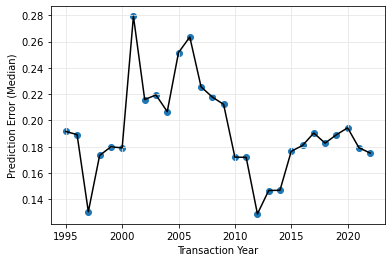

In [15]:
dz = df_combined.groupby('Year').agg({'Diff_Price': ['median']}).reset_index()

fig, ax = plt.subplots(1,1)
plt.scatter(dz['Year'],dz['Diff_Price'])
plt.plot(dz['Year'],dz['Diff_Price'],color=(0,0,0))
plt.xlabel('Transaction Year')
plt.ylabel('Prediction Error (Median)')
plt.grid(color=(.9,.9,.9))
plt.show()

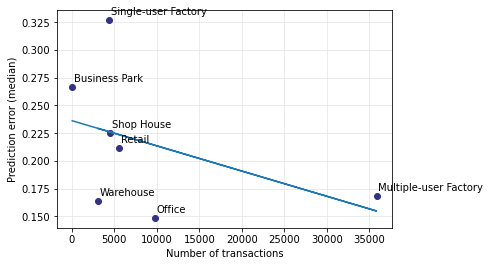

In [16]:
dg = df_combined.groupby('Property_type').agg({'Diff_Price': ['median', 'count']}).reset_index()

fig, ax = plt.subplots()
plt.scatter(dg['Diff_Price']['count'], dg['Diff_Price']['median'], color = (.2, .2, .5))
plt.grid(color = (0.9,0.9,0.9))
ax.set_axisbelow(True)
plt.plot(dg['Diff_Price']['count'], smf.ols(data = dg['Diff_Price'], formula = 'median ~ count').fit().predict(dg['Diff_Price']['count']))
ax.set_xlabel('Number of transactions')
ax.set_ylabel('Prediction error (median)')
for i in range(len(dg)):
    plt.text(dg['Diff_Price'].loc[i, 'count']+200, dg['Diff_Price'].loc[i, 'median']+.005, dg.loc[i, 'Property_type'][0])
    


Intercept        0.322719
np.log(count)   -0.013256
dtype: float64
                      0         1
Intercept      0.077489  0.567948
np.log(count) -0.042691  0.016178


Intercept        3.382853
np.log(count)    1.157727
dtype: float64

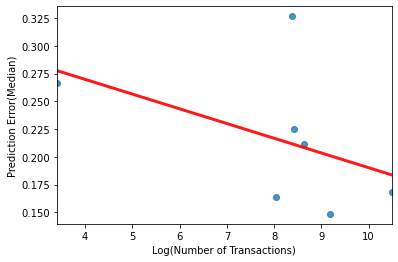

In [17]:
dg = df_combined.groupby('Property_type').agg({'Diff_Price': ['median'], 'Property_type':['count']}).reset_index()
sns.regplot(x=np.log(dg['Property_type']['count']),y=dg['Diff_Price'], ci = None, line_kws={"color":"r","alpha":0.9,"lw":3})
dg.columns = dg.columns.droplevel(0)
plt.xlabel('Log(Number of Transactions)') 
plt.ylabel('Prediction Error(Median)') 
res = smf.ols(data = dg, formula = 'median ~ np.log(count)').fit()
print(res.params)
print(res.conf_int())
abs(res.params/res.bse)

Intercept                 -0.680499
np.log(Valuation_Price)    0.068109
dtype: float64
                                0         1
Intercept               -0.777178 -0.583820
np.log(Valuation_Price)  0.061111  0.075107


Intercept                  13.795966
np.log(Valuation_Price)    19.076419
dtype: float64

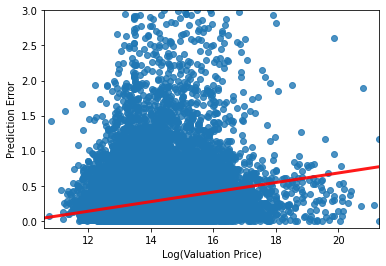

In [18]:
sns.regplot(x=np.log(df_combined['Valuation_Price']),y=df_combined['Diff_Price'], ci = None, line_kws={"color":"r","alpha":0.9,"lw":3})
plt.ylim([-0.1,3])
plt.xlabel('Log(Valuation Price)')
plt.ylabel('Prediction Error')

res = smf.ols(data = df_combined, formula = 'Diff_Price ~ np.log(Valuation_Price)').fit()
print(res.params)
print(res.conf_int())

abs(res.params/res.bse)

Intercept          -0.121432
np.log(Area_sqm)    0.073878
dtype: float64
                         0         1
Intercept        -0.149977 -0.092887
np.log(Area_sqm)  0.068467  0.079289


Intercept            8.337914
np.log(Area_sqm)    26.761580
dtype: float64

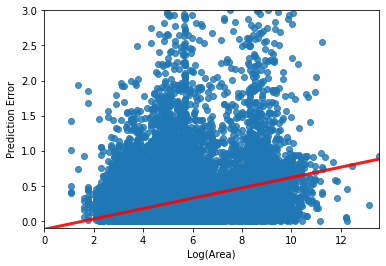

In [19]:


sns.regplot(x=np.log(df_combined['Area_sqm']),y=df_combined['Diff_Price'], ci = None, line_kws={"color":"r","alpha":0.9,"lw":3})
# plt.ylim([0,1])
plt.ylim([-0.1,3])
# plt.xlim([0,50000])
# plt.xlim([0,100000])
plt.xlabel('Log(Area)')
plt.ylabel('Prediction Error') 

res = smf.ols(data = df_combined, formula = 'Diff_Price ~ np.log(Area_sqm)').fit()
print(res.params)
print(res.conf_int())

abs(res.params/res.bse)

Intercept    0.208392
Age_years    0.004360
dtype: float64
                  0         1
Intercept  0.199618  0.217165
Age_years  0.003839  0.004881


Intercept    46.554600
Age_years    16.404666
dtype: float64

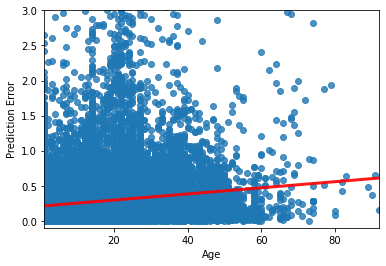

In [20]:
sns.regplot(x=df_combined['Age_years'],y=df_combined['Diff_Price'], ci = None, line_kws={"color":"r","alpha":0.9,"lw":3})
plt.ylim([-0.1,3])
plt.xlabel('Age') 
plt.ylabel('Prediction Error')

res = smf.ols(data = df_combined, formula = 'Diff_Price ~ Age_years').fit()
print(res.params)
print(res.conf_int())

abs(res.params/res.bse)

Intercept                  0.187829
np.log(Median_resi_psf)   -0.000055
dtype: float64
                                0         1
Intercept               -0.328933  0.704592
np.log(Median_resi_psf) -0.072563  0.072453


Intercept                  0.733518
np.log(Median_resi_psf)    0.001537
dtype: float64

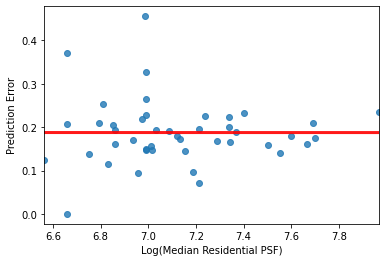

In [21]:
dg = df_combined.groupby('Planning_area').agg({'Diff_Price': ['median'], 'Median_resi_psf':['median']}).reset_index()
sns.regplot(x=np.log(dg['Median_resi_psf']),y=dg['Diff_Price'], ci = None, line_kws={"color":"r","alpha":0.9,"lw":3})
plt.xlabel('Log(Median Residential PSF)') 
plt.ylabel('Prediction Error') 
res = smf.ols(data = dg, formula = 'Diff_Price ~ np.log(Median_resi_psf)').fit()
print(res.params)
print(res.conf_int())

abs(res.params/res.bse)



Intercept                        0.258061
np.log(Planning_area_density)   -0.009516
dtype: float64
                                      0         1
Intercept                      0.202797  0.313326
np.log(Planning_area_density) -0.016403 -0.002630


Intercept                        9.423553
np.log(Planning_area_density)    2.788707
dtype: float64

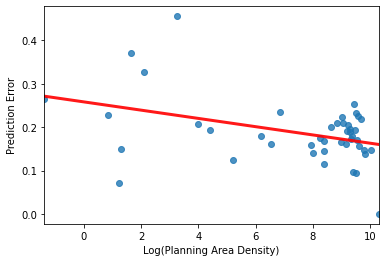

In [22]:
dg = df_combined.groupby('Planning_area').agg({'Diff_Price': ['median'], 'Planning_area_density':['median']}).reset_index()

sns.regplot(x=np.log(dg['Planning_area_density']),y=dg['Diff_Price'], ci = None, line_kws={"color":"r","alpha":0.9,"lw":3})
plt.xlabel('Log(Planning Area Density)')
plt.ylabel('Prediction Error') 
res = smf.ols(data = dg, formula = 'Diff_Price ~ np.log(Planning_area_density)').fit()
print(res.params)
print(res.conf_int())
abs(res.params/res.bse)

Intercept                           0.277972
np.log(Planning_area_population)   -0.009446
dtype: float64
                                         0         1
Intercept                         0.206936  0.349009
np.log(Planning_area_population) -0.016522 -0.002370


Intercept                           7.896969
np.log(Planning_area_population)    2.694078
dtype: float64

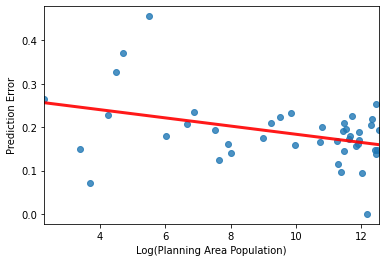

In [23]:
dg = df_combined.groupby('Planning_area').agg({'Diff_Price': ['median'], 'Planning_area_population':['median']}).reset_index()

sns.regplot(x=np.log(dg['Planning_area_population']),y=dg['Diff_Price'], ci = None, line_kws={"color":"r","alpha":0.9,"lw":3})

plt.xlabel('Log(Planning Area Population)') 
plt.ylabel('Prediction Error') 
res = smf.ols(data = dg, formula = 'Diff_Price ~ np.log(Planning_area_population)').fit()
print(res.params)
print(res.conf_int())

abs(res.params/res.bse)

Intercept                     0.223978
np.log(Planning_area_size)   -0.006081
dtype: float64
                                   0         1
Intercept                   0.158960  0.288997
np.log(Planning_area_size) -0.016232  0.004070


Intercept                     6.951978
np.log(Planning_area_size)    1.208920
dtype: float64

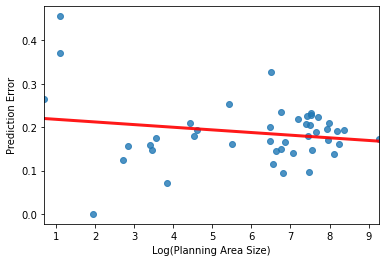

In [24]:
dg = df_combined.groupby('Planning_area').agg({'Diff_Price': ['median'], 'Planning_area_size':['count']}).reset_index()

sns.regplot(x=np.log(dg['Planning_area_size']),y=dg['Diff_Price'], ci = None, line_kws={"color":"r","alpha":0.9,"lw":3})

plt.xlabel('Log(Planning Area Size)') 
plt.ylabel('Prediction Error') 
res = smf.ols(data = dg, formula = 'Diff_Price ~ np.log(Planning_area_size)').fit()
print(res.params)
print(res.conf_int())
abs(res.params/res.bse)

## Zillow case study

In [25]:
dz = df_multi_fac.groupby('Quarter').agg({'Diff_Price': ['median']}).reset_index()
dz = dz.drop(dz. index[0])
dz



,Quarter,Diff_Price
,,median
1,1995Q1,0.195326
2,1995Q2,0.257323
3,1995Q3,0.225028
4,1995Q4,0.208265
5,1996Q1,0.213667
...,...,...
103,2020Q4,0.148315
104,2021Q1,0.167822
105,2021Q2,0.168129
